<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/kplr003939679.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [1]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 4.5 MB/s 
     |████████████████████████████████| 4.5 MB 64.5 MB/s 
     |████████████████████████████████| 41 kB 204 kB/s 
     |████████████████████████████████| 98 kB 7.2 MB/s 
     |████████████████████████████████| 832 kB 44.7 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 3.6 MB 24.9 MB/s 


# **Import**

In [2]:
import matplotlib.pyplot as plt
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel

matplotlib.rcParams['figure.figsize'] = (15,8)

# The Source

In [3]:
source = lk.search_lightcurve("kplr003939679", author="Kepler", cadence="long",quarter = 9).download()
source

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5159460234645,nan,nan,1100000000000000000,-1.012397e-03,1102.49863,854.08325,34237,4.7290666e+05,1.8503160e+01,5.2758242e+03,1.8982526e+00,nan,nan,1100000000000000000,nan,nan,nan,nan,1102.49863,4.1299983e-05,854.08325,4.6586450e-05,-1.2172425e-02,6.1462753e-02
808.5363803858709,4.7797625e+05,1.8686659e+01,1100000000000000000,-1.011634e-03,1102.49858,854.08315,34238,4.7269991e+05,1.8499372e+01,5.2673271e+03,1.8943648e+00,4.7797625e+05,1.8686659e+01,1100000000000000000,nan,nan,nan,nan,1102.49858,4.1312989e-05,854.08315,4.6594752e-05,-1.2100032e-02,6.1016291e-02
808.5568147485101,4.7792747e+05,1.8690573e+01,1100000000000000000,-1.010871e-03,1102.49856,854.08287,34239,4.7264572e+05,1.8499857e+01,5.2869648e+03,1.8968158e+00,4.7792747e+05,1.8690573e+01,1100000000000000000,nan,nan,nan,nan,1102.49856,4.1318053e-05,854.08287,4.6600533e-05,-1.2172587e-02,6.0764655e-02
808.5772491112584,4.7802691e+05,1.8694529e+01,1100000000000000000,-1.010109e-03,1102.49891,854.08239,34240,4.7274597e+05,1.8501020e+01,5.2689395e+03,1.8948542e+00,4.7802691e+05,1.8694529e+01,1100000000000000000,nan,nan,nan,nan,1102.49891,4.1307125e-05,854.08239,4.6588251e-05,-1.1878989e-02,6.0279399e-02
808.5976834743633,4.7803616e+05,1.8687654e+01,1100000000000000000,-1.009346e-03,1102.49867,854.08202,34241,4.7276259e+05,1.8500679e+01,5.2693555e+03,1.8980058e+00,4.7803616e+05,1.8687654e+01,1100000000000000000,nan,nan,nan,nan,1102.49867,4.1313277e-05,854.08202,4.6580331e-05,-1.1999779e-02,5.9768606e-02
808.6181179375853,4.7813319e+05,1.8697720e+01,1100000000000000000,-1.008582e-03,1102.49895,854.08187,34242,4.7285566e+05,1.8502348e+01,5.2763965e+03,1.8957442e+00,4.7813319e+05,1.8697720e+01,1100000000000000000,nan,nan,nan,nan,1102.49895,4.1307325e-05,854.08187,4.6576453e-05,-1.1954075e-02,5.9609059e-02
808.6385523010322,4.7806166e+05,1.8701475e+01,1100000000000000000,-1.007819e-03,1102.49885,854.08121,34243,4.7279609e+05,1.8501585e+01,5.2694282e+03,1.8992625e+00,4.7806166e+05,1.8701475e+01,1100000000000000000,nan,nan,nan,nan,1102.49885,4.1310381e-05,854.08121,4.6578822e-05,-1.1982584e-02,5.8938801e-02
808.6589865647184,4.7808828e+05,1.8705345e+01,1100000000000000000,-1.007055e-03,1102.49890,854.08080,34244,4.7282612e+05,1.8500685e+01,5.2736221e+03,1.8959148e+00,4.7808828e+05,1.8705345e+01,1100000000000000000,nan,nan,nan,nan,1102.49890,4.1306153e-05,854.08080,4.6573281e-05,-1.1823174e-02,5.8411039e-02


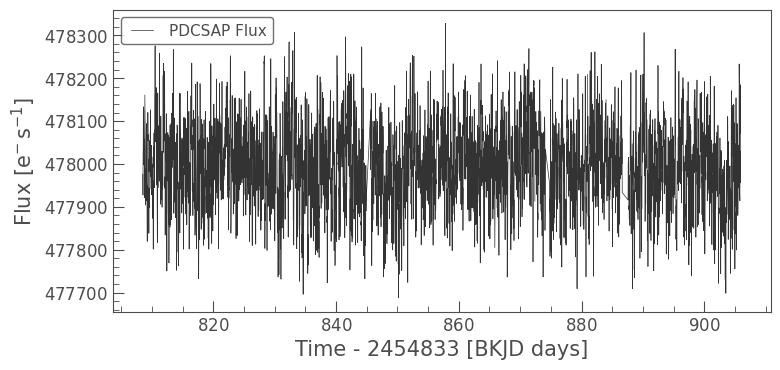

In [4]:
source.plot(label='PDCSAP Flux', normalize=False)

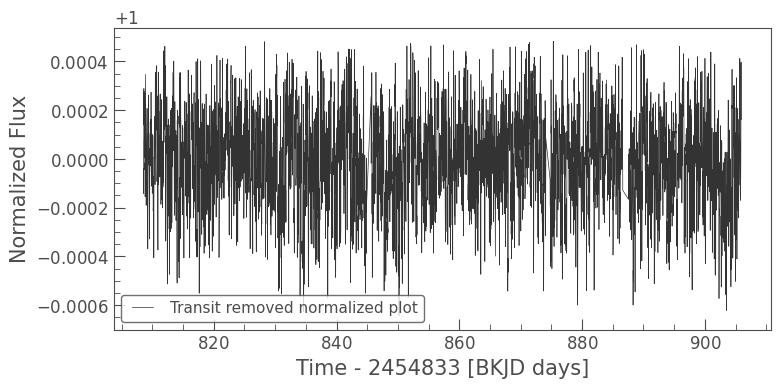

In [5]:
rem_out=source.remove_outliers(sigma_upper = 2.5).normalize()
rem_out.plot(label='Transit removed normalized plot', normalize = True)

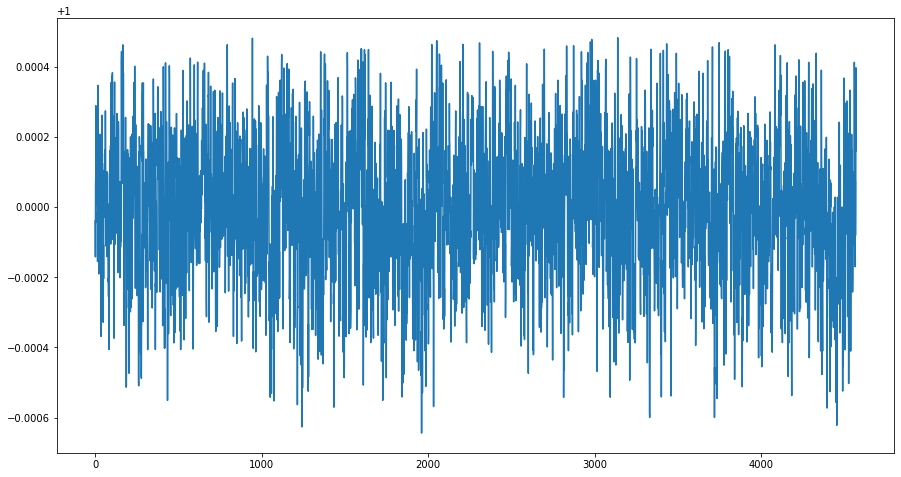

In [6]:
flux = rem_out.flux.value
time = rem_out.time.value
plt.figure(figsize=(15,8))
plt.plot(flux)

In [7]:
smoothed_signal = convolve(flux, Box1DKernel(16))

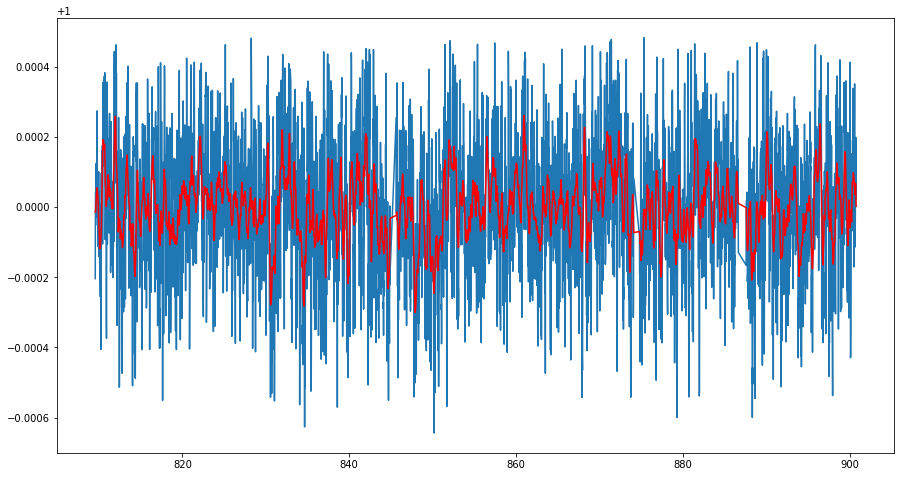

In [8]:
index = 50
ind = 250
plt.plot(time[index:-ind],flux[index:-ind])
plt.plot(time[index:-ind], smoothed_signal[index:-ind],color='red')

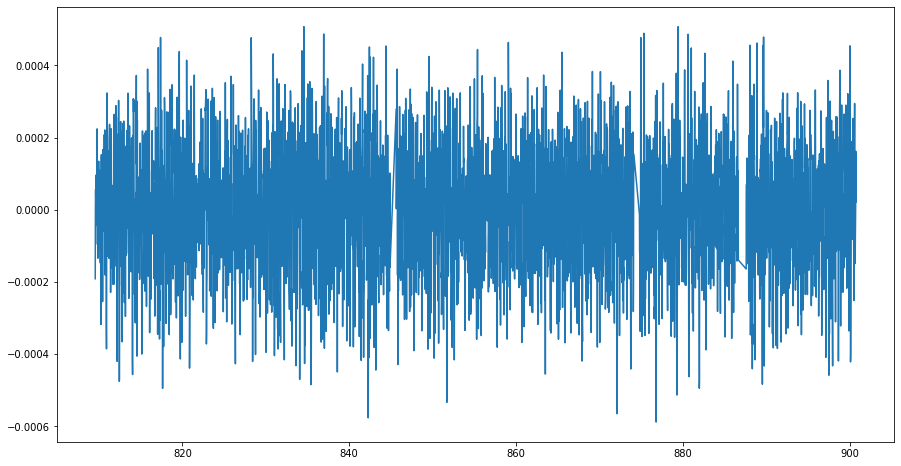

In [9]:
flkr=flux[index:-ind]-smoothed_signal[index:-ind]
plt.figure(figsize=(15,8))
plt.plot(time[index:-ind],flkr)

In [10]:
np.sqrt(np.mean(flkr**2))/1e-3

0.16982232045847923